# Network of links between actors

This tutorial will show you how to work with social-ecological network with `ABSESpy`.

In [1]:
from abses import MainModel

model = MainModel()

agents = model.agents.new(num=10)
agents

<ActorsList: (10)Actor>

In [ ]:
agents.random.link(link="test", p=0.6, mutual=False)

# Visualize links using networkx
import matplotlib.pyplot as plt
import networkx as nx
G = model.human.get_graph("test")
plt.figure(figsize=(5,4))
nx.draw(G, node_size=30, with_labels=False)
plt.show()

## Import Graph to create agents

In [3]:
import numpy as np
import networkx as nx

rng = np.random.default_rng()
a = rng.integers(low=0, high=2, size=(10, 10))
DG = nx.from_numpy_array(a, create_using=nx.DiGraph)

nx.draw(DG, arrows=True)

In [4]:
nx.to_dict_of_lists(DG)

{0: [0, 1, 2, 4, 5, 9],
 1: [3, 4, 5, 6, 9],
 2: [0, 2, 4, 6, 9],
 3: [0, 2, 3, 4, 6, 7, 8, 9],
 4: [0, 5, 6, 9],
 5: [1, 3, 6, 8, 9],
 6: [0, 1, 4, 6, 7, 8],
 7: [0, 1, 2, 3, 4, 5, 6, 7, 8],
 8: [2, 4, 6, 8, 9],
 9: [0, 5, 6, 9]}

In [ ]:
from abses import Actor


class NodeActor(Actor):
    marker = "^"


# Create actors first
nodes = model.agents.new(NodeActor, num=len(DG.nodes))
# Map graph nodes to actors by index
mapping = {i: actor for i, actor in enumerate(nodes)}
# Import edges as links
model.human.add_links_from_graph(DG, link_name="imported", mapping_dict=mapping)
nodes

<ActorsList: (10)NodeActor>

<Axes: >

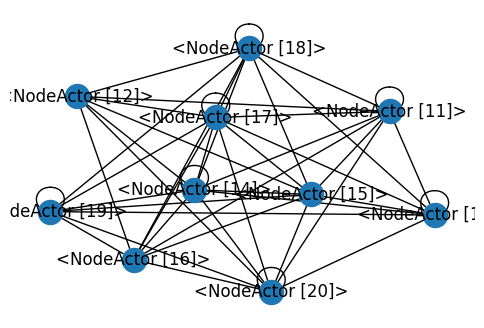

In [ ]:
# Visualize links using networkx
import matplotlib.pyplot as plt
import networkx as nx
G = model.human.get_graph("imported")
plt.figure(figsize=(5,4))
nx.draw(G, node_size=30, with_labels=False)
plt.show()